In [1]:
import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex=True)

# The Flagpole

In [2]:
rho, E, k, l, a, w = sp.symbols('rho E k l a omega', positive=True, real=True, constant=True)
u = sp.symbols('u', cls=sp.Function)
x, t = sp.symbols('x t', real=True)
ua = u(x, t)   # Function u applied to x, t
rho, E, k, l, u(x, t), ua, a, w

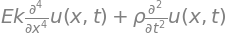

In [3]:
eq = rho*ua.diff(t, 2) + E*k*ua.diff(x, 4)
eq

In [4]:
bc0 = ua.subs(x, 0) - a*sp.sin(w*t)
bc1 = ua.diff(x).subs(x,0)
bc2 = ua.diff(x, 2)
bc3 = ua.diff(x, 3)
bc0, bc1, bc2, bc3

⎛                                            2             3         ⎞
⎜                       ⎛∂          ⎞│      ∂             ∂          ⎟
⎜-a⋅sin(ω⋅t) + u(0, t), ⎜──(u(x, t))⎟│   , ───(u(x, t)), ───(u(x, t))⎟
⎜                       ⎝∂x         ⎠│x=0    2             3         ⎟
⎝                                          ∂x            ∂x          ⎠

In [5]:
xis, taus = sp.symbols('xi tau', real=True)
xis, taus

In [6]:
xi = x/l
tau = w*t
sp.Eq(xis, xi), sp.Eq(taus, tau)

In [7]:
v = sp.symbols('v', cls=sp.Function)
v(xis, taus)

In [8]:
w0, w1, w2 = sp.symbols('w0:3', cls=sp.Wild)
w_expr = sp.Derivative(w0, (w1, w2))  # Match deriviatives

In [9]:
(ua.diff(x,2)).match(w_expr)

In [10]:
[d.match(sp.Derivative(w0, (w1, w2))) for d in eq.atoms(sp.Derivative)]

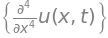

In [11]:
eq.find(sp.Derivative(w1, (x, w2)))

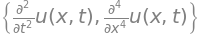

In [12]:
eq.find(sp.Derivative(w0, (w1, w2)))

In [13]:
[d.match(sp.Derivative(w0, (w1, w2))) for d in eq.atoms(sp.Derivative)]

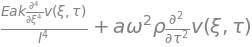

In [14]:
eq_scale = eq.replace(
        sp.Derivative(u(x,t), (x, w2)), a/l**w2*sp.Derivative(v(xis, taus), (xis, w2))
    ).replace(
        sp.Derivative(u(x,t), (t, w2)), a*w**w2*sp.Derivative(v(xis, taus), (taus, w2))
    )
eq_scale

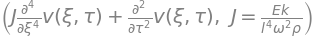

In [15]:
Js = sp.symbols('J', positive=True)
J = E*k/(l**4*w**2*rho)
eq_scale.func(*[e/(a*w**2*rho) for e in eq_scale.args]).subs(J, Js), sp.Eq(Js, J)